In [10]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [12]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


In [4]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [5]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_clf.predict([[5.5,1.7]])

array([1.])

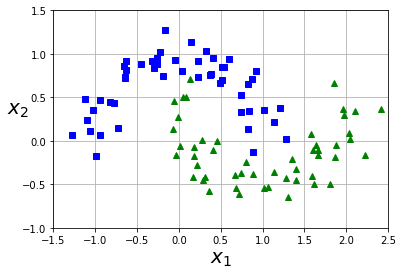

In [38]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/Users/James/.pyenv/versions/3.8.5/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

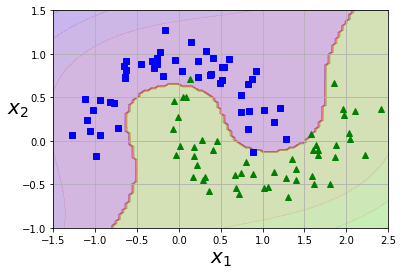

In [40]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


In [144]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
    (coeff = SVC.named_steps['clf'])
])

poly_kernel_svm_clf.fit(X,y)

<>:4: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:4: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<ipython-input-144-19fcfe6bc7e8>:4: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))


AttributeError: type object 'SVC' has no attribute 'named_steps'

Exercises
1. To maximise the distance between the classes, this distance can be controlled by adjusting the hyperparameters. 
2. A support vector is the class point that is closest to a point of another class. These points are used to determine the "width of the street".
3. SVM are very senstitive to differently scaled data. Data of different scales may result in very narrow streets and inneffective decision boundaries. 
4. An SVM can output the distance from the boundary to the new point, which can roughly be translated to a confidence score. 
5. Underfitting - increase C, increase gamma

In [116]:
#creating linearly seperable data
np.random.seed = 42
data_1 = np.random.rand(10,2)
data_2 = 0.75 + np.random.rand(10,2)
X= np.vstack((data_1, data_2))

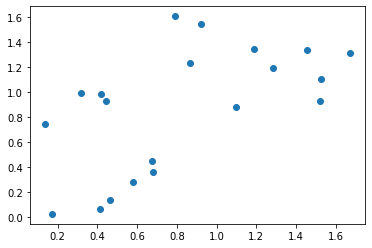

In [117]:
plt.scatter(x = X[:,0], y = X[:,1])

if x < 0.8 and y < 1.2, y = 0
else:
y = 1

In [124]:
y = np.where(X[:,0] < 0.8, 0, 1)

In [90]:
from sklearn.svm import LinearSVC

In [140]:
svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge")), 
])

svc_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [141]:
svc_clf.predict([[0.1,0.2]])

array([0])

In [142]:
svc_clf.predict([[1.1,1.2]])

array([1])

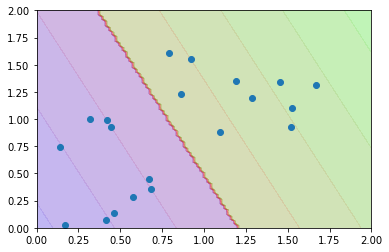

In [152]:
plot_predictions(svc_clf,[0,2,0,2])
plt.scatter(x = X[:,0], y = X[:,1])